In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
hotel_df = pd.read_excel(r'data_hotel.xlsx') 
review_df = pd.read_excel(r'review_hotel.xlsx')

In [9]:
hotel_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
0,h0001,Midtown Residence Marvell City Surabaya,NaN,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000


In [10]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           1199 non-null   object 
 1   hotel_name         1199 non-null   object 
 2   hotel_description  1098 non-null   object 
 3   hotel_province     1199 non-null   object 
 4   hotel_city         1199 non-null   object 
 5   hotel_address      1199 non-null   object 
 6   price_per_night    1193 non-null   float64
dtypes: float64(1), object(6)
memory usage: 65.7+ KB


In [11]:
hotel_df.isnull().sum()

hotel_id               0
hotel_name             0
hotel_description    101
hotel_province         0
hotel_city             0
hotel_address          0
price_per_night        6
dtype: int64

In [12]:
hotel_df.loc[hotel_df['hotel_description'].isnull()|hotel_df['price_per_night'].isnull()]

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
0,h0001,Midtown Residence Marvell City Surabaya,NaN,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667
26,h0027,ibis budget Surabaya Diponegoro,NaN,Jawa Timur,Surabaya,Jalan Raya Diponegoro no 183,206232.000000
41,h0042,Citra Suites Surabaya,NaN,Jawa Timur,Surabaya,Jalan Bratang Binangun 53 A,237500.000000
47,h0048,Novotel Surabaya Hotel & Suite,NaN,Jawa Timur,Surabaya,Jalan Ngagel No. 173 - 175,545522.000000
48,h0049,Novotel Samator Surabaya Timur,NaN,Jawa Timur,Surabaya,Jl Kedung Baruk 28 Rungkut,616038.500000
...,...,...,...,...,...,...,...
434,h0435,OYO 990 Stadion Residence,NaN,Sumatra Utara,Medan,"Jl. Jati II No.1, Teladan Bar., Medan Kota, Ko...",85326.500000
435,h0436,OYO 552 Raz House,NaN,Sumatra Utara,Medan,"Jl. Canna Raya Blok K No.9,19,20 ,Tj. Rejo, Me...",428106.250000
436,h0437,OYO 711 Salam Residence Syariah,NaN,Sumatra Utara,Medan,"Jl. Ringroad No.92, Sei Sikambing B, Medan Sun...",NaN
437,h0438,OYO 1371 Carofin Guest House,NaN,Sumatra Utara,Medan,"Jl. Sei Tuntung Baru, Babura, Medan Baru, Kota...",118132.000000


In [13]:
hotel_df = hotel_df.loc[(hotel_df['hotel_description'].notnull())]

print(len(hotel_df))

1098


In [14]:
hotel_df

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000
5,h0006,POP! Hotel Stasiun Kota Surabaya,Sebuah Hotel Modern yang Terjangkau di Jawa Timur,Jawa Timur,Surabaya,"Jl. Waspada No.58, Surabaya, Jawa Timur, Indon...",276333.333333
...,...,...,...,...,...,...,...
1194,h1195,Restu Hotel Yogyakarta,Akomodasi yang nyaman dan modern di Yogyakarta...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Batikan No. 7, Pandeyan, Kec. Umbulharjo, ...",150000.000000
1195,h1196,Oryza Hotel Malioboro,Ideal accommodation options in the Malioboro a...,Daerah Istimewa Yogyakarta,Jogja,"Sosrowijayan St No.49-51, Sosromenduran, Gedon...",180000.000000
1196,h1197,Hotel Asri Graha Yogyakarta,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Veteran No. 184 A, Umbulharjo, Yogyakarta,...",262500.000000
1197,h1198,Tasneem Convention Hotel Yogyakarta,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Kawasan Mandira Baruga, Jl. Brigjen Katamso, K...",391666.666667


In [15]:
review_df.head()

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good


In [16]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   booking_id     4306 non-null   object 
 1   booking_date   4306 non-null   object 
 2   hotel_id       3833 non-null   object 
 3   hotel_name     4306 non-null   object 
 4   stay_duration  4306 non-null   int64  
 5   adults         4306 non-null   int64  
 6   children       4306 non-null   int64  
 7   rating         4306 non-null   float64
 8   review         4306 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 302.9+ KB


In [17]:
review_df.loc[review_df['hotel_id'].isnull()]

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
30,b0031,28-05-2020,NaN,Grand Dafam Signature Surabaya,1,1,0,10.0,Semuanya membuat nyaman
31,b0032,27-05-2020,NaN,Grand Dafam Signature Surabaya,2,2,0,8.4,Hotel strategis di pusat kota
32,b0033,09-04-2020,NaN,Grand Dafam Signature Surabaya,1,2,0,10.0,Hotel yang sangat bagus
33,b0034,26-03-2020,NaN,Grand Dafam Signature Surabaya,2,2,1,9.2,2 malam yg menyenangkan
34,b0035,08-03-2020,NaN,Grand Dafam Signature Surabaya,2,2,0,10.0,Hotel yang menyenangkan
...,...,...,...,...,...,...,...,...,...
2626,b2627,10-10-2017,NaN,Pullman Jakarta Indonesia,2,2,0,10.0,Memuaskan
2627,b2628,17-02-2020,NaN,Mercure Jakarta Pantai Indah Kapuk,2,2,2,9.2,Great customer service
2628,b2629,10-01-2020,NaN,Mercure Jakarta Pantai Indah Kapuk,1,1,0,9.6,Hotel yang terletak 1 gedung dengan mall pik a...
2629,b2630,06-11-2019,NaN,Mercure Jakarta Pantai Indah Kapuk,3,1,1,9.2,Dekat dengan mall jadi mudah untuk makan atau ...


In [18]:
review_df = review_df.loc[(review_df['hotel_id'].notnull())]

print(len(review_df))

3833


In [19]:
review_df

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good
...,...,...,...,...,...,...,...,...,...
4301,b4302,10-08-2019,h0791,The Luxton Bandung,1,2,2,3.6,Hotel kurang perawatan dan membosankan
4302,b4303,25-07-2019,h0791,The Luxton Bandung,2,2,2,6.8,Kurang perawatan
4303,b4304,08-07-2019,h0791,The Luxton Bandung,2,2,2,10.0,Mantul
4304,b4305,15-04-2019,h0791,The Luxton Bandung,3,2,2,3.6,Kecewa


In [20]:
rating_df = review_df.groupby('hotel_name').agg({'booking_id':'size','rating':'mean'}).rename(columns={'booking_id':'num_review','rating':'avg_rating'}).reset_index()

rating_df.sort_values(by='num_review',ascending = False)

,hotel_name,num_review,avg_rating
163,Hotel Cemerlang,20,8.28
209,InterContinental Bandung Dago Pakar,20,9.52
365,Valore Hotel,20,7.48
359,U Janevalla Bandung,20,8.28
367,Verona Palace Hotel,20,8.32
...,...,...,...
97,Front One Residence Syariah Mampang,1,10.00
84,Ethan Hotel,1,10.00
50,Barito Mansion,1,9.60
20,Amaris Hotel Slipi,1,8.40


In [21]:
hotel_rating_df = pd.merge(hotel_df,rating_df,on = ['hotel_name'],how = 'inner')

hotel_rating_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,num_review,avg_rating
0,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000,10,8.32
1,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000,10,8.76
2,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333,10,8.52
3,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000,10,8.04
4,h0006,POP! Hotel Stasiun Kota Surabaya,Sebuah Hotel Modern yang Terjangkau di Jawa Timur,Jawa Timur,Surabaya,"Jl. Waspada No.58, Surabaya, Jawa Timur, Indon...",276333.333333,10,7.52


In [22]:
hotel_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           404 non-null    object 
 1   hotel_name         404 non-null    object 
 2   hotel_description  404 non-null    object 
 3   hotel_province     404 non-null    object 
 4   hotel_city         404 non-null    object 
 5   hotel_address      404 non-null    object 
 6   price_per_night    404 non-null    float64
 7   num_review         404 non-null    int64  
 8   avg_rating         404 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 31.6+ KB


In [23]:
C = hotel_rating_df['avg_rating'].mean()
print(C)

8.36863547068992


In [24]:
m = hotel_rating_df['num_review'].quantile(0.8)
print(m)

10.0


In [25]:
def hotel_rating(df, var=0.8):
    v = df['num_review']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['num_review'].quantile(var)
    df['score'] = (v/(m+v))*R + (m/(m+v))*C
    return df['score']
    
hotel_rating(hotel_rating_df)

hotel_rating_df.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,num_review,avg_rating,score
0,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000,10,8.32,8.344318
1,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000,10,8.76,8.564318
2,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333,10,8.52,8.444318
3,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000,10,8.04,8.204318
4,h0006,POP! Hotel Stasiun Kota Surabaya,Sebuah Hotel Modern yang Terjangkau di Jawa Timur,Jawa Timur,Surabaya,"Jl. Waspada No.58, Surabaya, Jawa Timur, Indon...",276333.333333,10,7.52,7.944318


In [26]:
def simple_recommender(df, top=100):
    df = df.loc[df['num_review'] >= m]
    df = df.sort_values(by='score', ascending=False)
    
    df = df[:top]
    return df
         
simple_recommender(hotel_rating_df, top=25)

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,num_review,avg_rating,score
377,h0764,InterContinental Bandung Dago Pakar,Alamat\n Jalan Resor Dago Pakar Raya 2B\n \n \...,Jawa Barat,Bandung,Jalan Resor Dago Pakar Raya 2B,1.646185e+06,20,9.52,9.136212
362,h0721,Hotel Marcopolo,"Hotel Bintang 3 di Menteng, Jakarta.\n \n Hote...",DKI Jakarta,Jakarta,"Jl. Teuku Cik Ditiro No.19, Menteng, Jakarta, ...",5.030000e+05,10,9.84,9.104318
143,h0495,favehotel Puri Indah Jakarta,Sebuah Hotel Mewah di Jakarta Barat persembaha...,DKI Jakarta,Jakarta Selatan,Jl. Kembang Abadi Raya Street Blok A1 Number 1...,4.126340e+05,10,9.84,9.104318
32,h0154,favehotel Tlogomas Malang,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Timur,Malang,"Jl. Tlogomas No. 25, Lowokwaru, Malang, Jawa T...",2.341350e+05,10,9.68,9.024318
132,h0484,Sunlake Hotel,Hotel Bintang 5 yang Memadukan Kemewahan dan K...,DKI Jakarta,Jakarta Utara,"Jl. Danau Permai Blok C1, Sunter, Jakarta Utar...",5.646142e+05,10,9.64,9.004318
178,h0531,POP! Hotel Pasar Baru Jakarta,Sebuah Hotel Modern yang Terjangkau di Pasar B...,DKI Jakarta,Jakarta,"Jl. K.H. Samanhudi No.17-19, Pasar Baru, Jakar...",3.542000e+05,10,9.64,9.004318
186,h0539,HARRIS Hotel & Conventions Kelapa Gading Jakarta,Dimana gaya hidup sehat dimulai\n \n Dirancang...,DKI Jakarta,Jakarta Utara,"Jl. Boulevard Kelapa Gading Blok M, Kelapa Gad...",9.460250e+05,10,9.60,8.984318
151,h0503,Ashley Jakarta Wahid Hasyim,Akomodasi yang luar biasa di Jakarta.\n \n Ako...,DKI Jakarta,Jakarta,"Jl. K.H. Wahid Hasyim, Thamrin, Jakarta, Indon...",5.031955e+05,10,9.60,8.984318
154,h0506,Teraskita Hotel Jakarta Managed by Dafam,Penginapan Yang Tenang Dan Nyaman di Cawang.\n...,DKI Jakarta,Jakarta Barat,"Jl. MT. Haryono Kav. 10A, Cawang, Jakarta Timu...",4.200000e+05,10,9.56,8.964318
248,h0606,HARRIS Vertu Hotel Harmoni,Akomodasi yang luar biasa di Jakarta.\n \n Ako...,DKI Jakarta,Jakarta,"Jl. Hayam Wuruk No.6, Harmoni, Jakarta, Indonesia",9.085000e+05,10,9.56,8.964318


In [27]:
df = hotel_rating_df.copy()

def user_prefer_recommender(df, ask_city, ask_max_price_per_night, top=100):
    #ask_city
    if ask_city.lower() == 'all':
        df = df
    else:
        def filter_city(x):
            if ask_city.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['hotel_city'].apply(lambda x: filter_city(x))]
        
    #ask max_price_per_night
    df = df.loc[df['price_per_night']<=int(ask_max_price_per_night)]
    

    df = df.loc[df['num_review']>=m]
    df = df.sort_values(by='score', ascending=False)
    
    #Top 100 Hotels
    df = df[:top]
    return df

user_prefer_recommender(df, ask_city = 'bandung', ask_max_price_per_night = 1000000)

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,num_review,avg_rating,score
378,h0765,The Salis Hotel Setiabudi,Hotel bintang 3 di Bandung yang menawarkan kei...,Jawa Barat,Bandung,"Jl. DR. Setiabudi No.272, Ledeng, Kec. Cidadap...",224333.333333,20,9.20,8.922878
388,h0775,The Green Forest Resort,Bersantai dan menikmati pengalaman yang tak te...,Jawa Barat,Bandung,"Jl. Sersan Bajuri No.102 Cihideung, Setiabudi,...",697948.500000,20,9.16,8.896212
379,h0766,Lenora Hotel,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Barat,Bandung,"Jl. KH. Wahid Hasyim No 20, Astana Anyar, Band...",213750.000000,16,9.20,8.880244
386,h0773,Grand Tebu Hotel,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Jawa Barat,Bandung,"Jl. L.L.R.E Martadinata (Riau) No. 207, Bandun...",458000.000000,20,9.12,8.869545
400,h0788,Best Western Premier La Grande,Hotel mewah bintang 4 dengan fasilitas dan des...,Jawa Barat,Bandung,"Jl. Merdeka No.25-29, Sumurbandung, Bandung, J...",433332.500000,20,9.12,8.869545
402,h0790,Hotel Dafam Rio,Hotel yang menarik dan terjangkau persembahan ...,Jawa Barat,Bandung,"Jl. R.E. Martadinata No.160, Merdeka, Sumur Ba...",413451.333333,20,9.08,8.842878
381,h0768,Grand Tjokro Bandung,Grand Tjokro Bandung merupakan bagian dari SAS...,Jawa Barat,Bandung,"Jl. Cihampelas No. 211-217, Bandung, Jawa Bara...",651527.833333,20,9.00,8.789545
401,h0789,New Moonlight Hotel,Penginapan Yang Tenang Dan Nyaman Di Bandung.\...,Jawa Barat,Bandung,"Jl. Terusan Pasir koja No. 24-26, Bandung, Ind...",203628.500000,20,8.92,8.736212
387,h0774,Vio Hotel Surapati,Hotel unik yang terletak di jantung kota Bandu...,Jawa Barat,Bandung,"Jl. Surapati No. 15, Bandung, Indonesia",228250.000000,20,8.92,8.736212
392,h0779,eL Hotel Royale Bandung,Hotel Mewah Bintang 4 Dengan Fasilitas Yang Le...,Jawa Barat,Bandung,"Jl. Merdeka No. 2, Bandung, Jawa Barat, Indonesia",437633.000000,20,8.88,8.709545


Text(0, 0.5, 'Number of hotel')

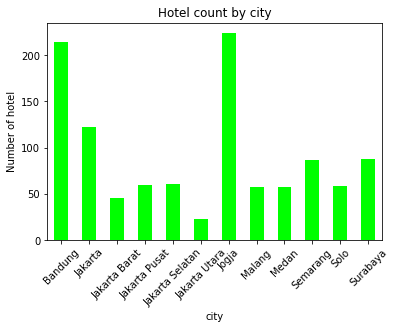

In [68]:
city = hotel_df.groupby("hotel_city").count()
city = city.reset_index()
city = city[["hotel_city","hotel_name"]]
city.rename(columns={"hotel_city":"city","hotel_name":"hotel count"},inplace = True)

city_bar = city.plot.bar(x="city", y="hotel count", rot = 90, legend = None, color = "lime", zorder = 3)
plt.xticks(rotation=45)
plt.title("Hotel count by city")
plt.ylabel("Number of hotel")

Text(0.5, 1.0, 'Hotel count percentage by city')

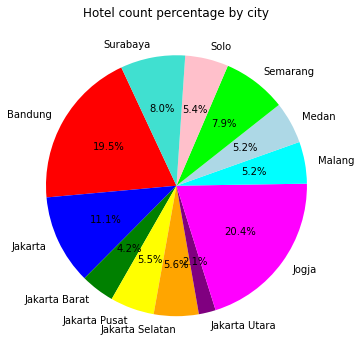

In [67]:
hotel_count = city["hotel count"]
colors = ["red","blue","green","yellow","orange","purple","magenta","aqua", "lightblue", "lime", "pink", "turquoise"]
city_labels = city["city"]
plt.figure(figsize=(8,6))
plt.pie(hotel_count, labels=city_labels, colors=colors, startangle=115, autopct="%1.1f%%")
plt.title("Hotel count percentage by city")

Text(0, 0.5, 'Number of hotel')

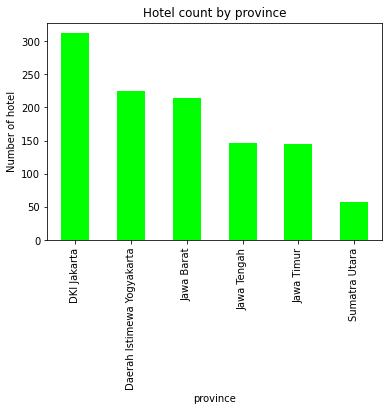

In [69]:
province = hotel_df.groupby("hotel_province").count()
province = province.reset_index()
province = province[["hotel_province","hotel_name"]]
province.rename(columns={"hotel_province":"province","hotel_name":"hotel count"},inplace = True)

province_bar = province.plot.bar(x="province", y="hotel count", rot = 90, legend = None, color = "lime", zorder = 5)
plt.xticks(rotation=90)
plt.title("Hotel count by province")
plt.ylabel("Number of hotel")

Text(0.5, 1.0, 'Hotel Count Percentage by Province')

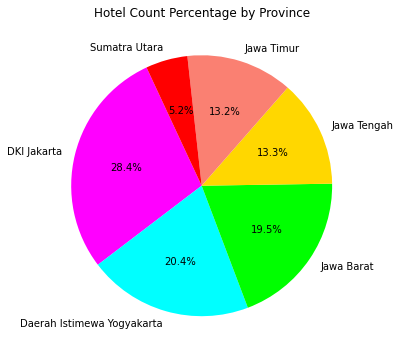

In [61]:
hotel_prov_count = province["hotel count"]
colors = ["magenta","aqua", "lime", "gold", "salmon", "red"]
province_labels = province["province"]
plt.figure(figsize=(8,6))
plt.pie(hotel_prov_count, labels=province_labels, colors=colors, startangle=115, autopct="%1.1f%%")
plt.title("Hotel Count Percentage by Province")

Text(0, 0.5, 'Hotel Price per Night (Rupiahs)')

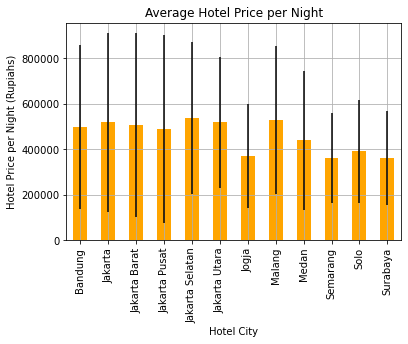

In [58]:
# Obtain the mean and standard deviation (STD)
price_mean = hotel_df.groupby(["hotel_city"]).mean()["price_per_night"]
price_std = hotel_df.groupby(["hotel_city"]).std()["price_per_night"]
# Create new dataframe for mean values
mean_df = pd.DataFrame({"hotel_city":price_mean.index, "price_per_night":price_mean.values})
mean_df = mean_df.set_index("hotel_city")
# Create bar chart with y error bar 
mean_df.plot(kind="bar", yerr=price_std.values, color="orange", legend=None)
plt.xticks(rotation=90)
plt.grid()
plt.title("Average Hotel Price per Night")
plt.xlabel("Hotel City")
plt.ylabel("Hotel Price per Night (Rupiahs)")

Text(0, 0.5, 'Hotel Price per Night (Rupiahs)')

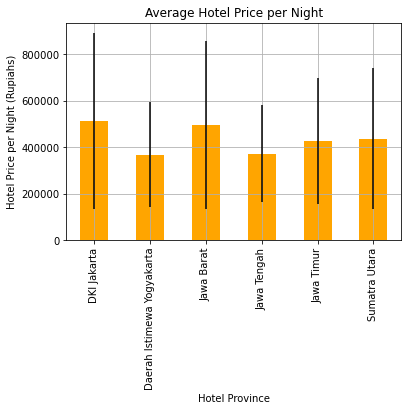

In [59]:
# Obtain the mean and standard deviation (STD)
price_prov_mean = hotel_df.groupby(["hotel_province"]).mean()["price_per_night"]
price_prov_std = hotel_df.groupby(["hotel_province"]).std()["price_per_night"]
# Create new dataframe for mean values
mean_prov_df = pd.DataFrame({"hotel_province":price_prov_mean.index, "price_per_night":price_prov_mean.values})
mean_prov_df = mean_prov_df.set_index("hotel_province")
# Create bar chart with y error bar 
mean_prov_df.plot(kind="bar", yerr=price_prov_std.values, color="orange", legend=None)
plt.xticks(rotation=90)
plt.grid()
plt.title("Average Hotel Price per Night")
plt.xlabel("Hotel Province")
plt.ylabel("Hotel Price per Night (Rupiahs)")